In [1]:
import sys
sys.path.append("../../")

from scipy.interpolate import CubicSpline
import math
import numpy as np
import matplotlib.pyplot as plt

from didgelab.evo.nuevolution import GeoGenome
from didgelab.calc.geo import Geo, geotools
from didgelab.util.didge_visualizer import vis_didge
from didgelab.calc.sim.sim import compute_impedance_iteratively, get_notes, compute_impedance, create_segments, get_log_simulation_frequencies


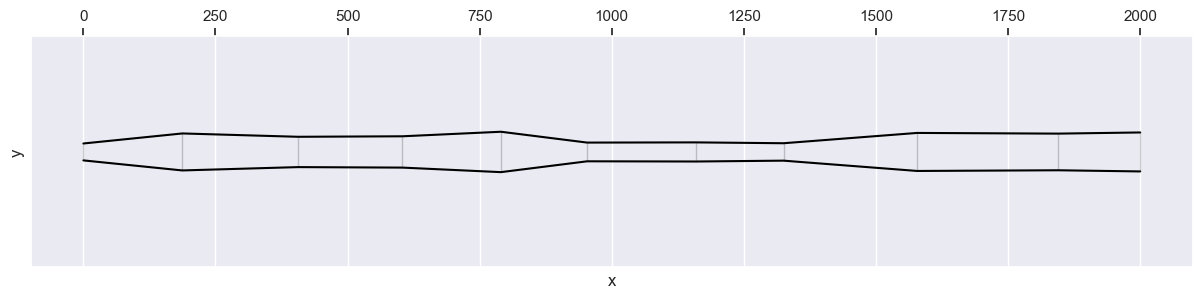

[0, 93.58897235777232, 296.6981489489366, 504.97326674190725, 696.9408068770754, 871.7579008783691, 1056.2472425558808, 1242.0706748982436, 1451.4381088520574, 1711.1796261364727, 1922.2461337788147]
[0, 46.79448617888616, 195.14356065335446, 400.8357078454219, 600.9570368094913, 784.3493538777223, 964.002571717125, 1149.1589587270623, 1346.7543918751505, 1581.308867494265, 1816.7128799576437]


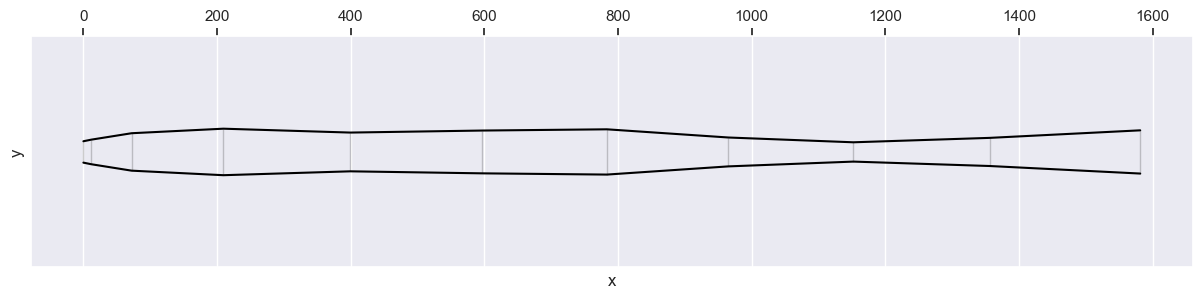

In [46]:
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline


def make_shape():
    length = 2000
    d0 = 32
    dend = 80
    n=10

    _x = np.random.uniform(0.3, 1.0, size=n)
    x = [0]
    for i in range(len(_x)):
        x.append(x[-1] + _x[i])

    #x = np.concatenate(([0], np.random.sample(n))) * length
    x = np.array(x)
    x = length*x/x[-1]
    y = np.random.sample(n)*(dend-d0) + d0
    y = np.concatenate(([d0], y))

    return x,y

def smooth(x1,y1):
    cs = CubicSpline(x1, y1)

    x2 = [0]
    for i in range(1, len(x1)):
        x2.append(0.5*(x1[i]+x1[i-1]))
        x2.append(x1[i])
    y2 = cs(x2)
    return x2,y2
np.random.seed(0)

for i in range(10):
    x1,y1 = make_shape()

    geo = Geo(list(zip(x1,y1)))
    vis_didge(geo)
    plt.show()

    x2,y2 = smooth(x1,y1)
    print(x2)
    x2,y2 = smooth(x2,y2)
    print(x2)
    x2,y2 = smooth(x2,y2)
    x2,y2 = smooth(x2,y2)
    geo = Geo(list(zip(x2,y2)))
    vis_didge(geo)
    plt.show()
    break

[0.0,
 766.8830376515554,
 847.3095986778094,
 875.174422525385,
 1089.7663659937937,
 1097.6270078546495,
 1205.5267521432877,
 1291.7882261333123,
 1430.378732744839,
 1783.5460015641595,
 1927.3255210020586]

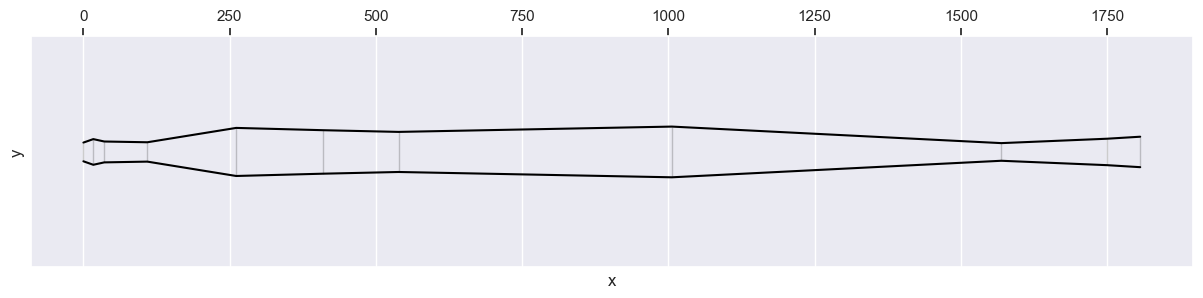

In [23]:
x2 = [0]
for i in range(1, len(x1)):
    x2.append(0.5*(x1[i]+x1[i-1]))

y2 = cs(x2)

geo = Geo(list(zip(x2,y2)))
vis_didge(geo)

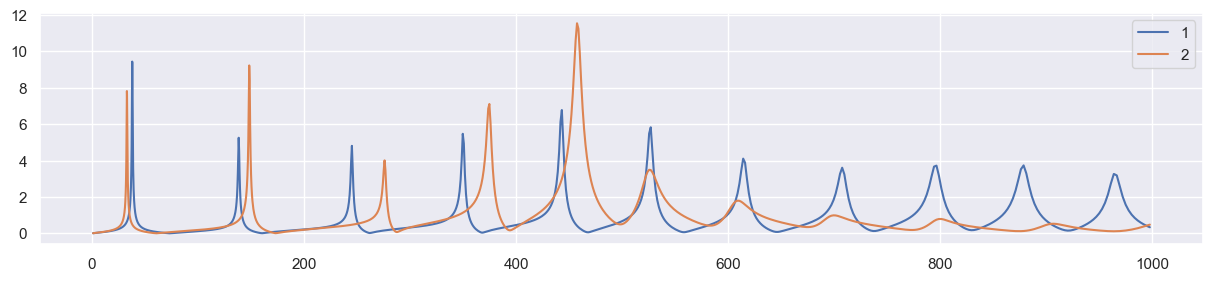

In [24]:
def analyse(x,y):
    geo = Geo(list(zip(x,y)))
    freqs = get_log_simulation_frequencies(1, 1000, 5)
    segments = create_segments(geo)
    impedances = compute_impedance(segments, freqs)
    notes = get_notes(freqs, impedances)
    return notes, freqs, impedances

notes1, freqs1, impedances1 = analyse(x1,y1)
notes2, freqs2, impedances2 = analyse(x2,y2)
plt.plot(freqs1, impedances1, label="1")
plt.plot(freqs2, impedances2, label="2")
plt.legend()


In [12]:
analyse(x2,y2)


,note_name,cent_diff,note_nr,freq,impedance,rel_imp
0,D#0,27.368344,-42,39.510568,11.546608,0.370272
1,C2,42.368344,-21,134.053648,2.062254,0.066132
2,C3,-32.631656,-9,256.740426,28.279986,0.906872
3,E3,42.368344,-5,337.794025,14.606528,0.468397
4,G3,42.368344,-2,401.707058,31.184103,1.000000
5,B4,-37.631656,2,483.263648,11.995080,0.384654
6,C#4,42.368344,4,568.099570,4.274425,0.137071
7,E4,2.368344,7,660.157598,2.748063,0.088124
8,F#4,22.368344,9,749.611876,1.920655,0.061591
9,G#4,17.368344,11,838.984298,1.543487,0.049496
